# Classification Dataset 4 (Mice Protein Expression )
Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_excel("Data_Cortex_Nuclear.xls")
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Checking for any null values

In [6]:
df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

BCL2_N       26.388889
H3MeK4_N     25.000000
BAD_N        19.722222
EGR1_N       19.444444
H3AcK18_N    16.666667
               ...    
CDK5_N        0.000000
pPKCG_N       0.000000
pGSK3B_N      0.000000
P70S6_N       0.000000
MouseID       0.000000
Length: 82, dtype: float64

In [18]:
#removing NaN
include = df.columns[df.isna().sum()/df.shape[0]< 0.70 ] 
df = df[include]
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


# Data Preprocessing

In [26]:
def imputation(df):
    #df = df.dropna(axis=0)
    df = df.fillna(df.mean())
    
    return df

def encoding(df):
    code = {'Control':1,
            'Ts65Dn':0,
            'Memantine':1,
            'Saline':0,
            'C/S':0,
            'S/C':1,
            'c-CS-m':0,
            'c-SC-m':1,
            'c-CS-s':2,
            'c-SC-s':3,
            't-CS-m':4,
            't-SC-m':5,
            't-CS-s':6,
            't-SC-s':7,
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
        
    return df

def feature_engineering(df):
    useless_columns = ['MouseID']
    for feature in useless_columns:
        if feature in df:
            df = df.drop(feature,axis=1)
    return df


In [27]:
df = encoding(df)
df = feature_engineering(df)
df = imputation(df)

In [28]:
copy_df = df.copy(deep=True)
y = copy_df['class']
X = copy_df.drop(['class'], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Discriminant Analysis DR

In [31]:
# create the lda model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#To check the performance of our classifier with a single linear discriminant.
lda = LDA(n_components=1)
#lda = LDA()
#lda.fit(X_train, y_train)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy0.7268518518518519


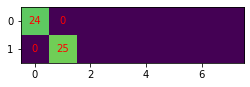

In [34]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[[ 0  0  0  0  0  0 24  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0 31  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0 26  0]]
Accuracy 0.24074074074074073


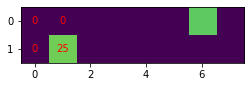

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [37]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


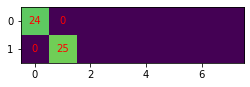

In [39]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

[10:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


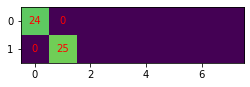

In [42]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Principle Component Analysis DR

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[21  0  3  0  0  0  0  0]
 [ 0 23  0  1  0  1  0  0]
 [ 2  3 21  0  0  0  0  1]
 [ 1  0  0 30  0  0  0  0]
 [10  0  0  0 20  2  0  0]
 [ 0  3  0  0  0 20  0  1]
 [ 2  0  3  0  2  0 15  5]
 [ 0  0  0  0  2  0  0 24]]
Accuracy 0.8055555555555556


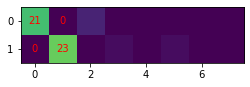

In [47]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


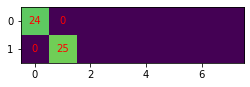

In [50]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [51]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


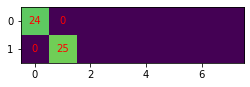

In [53]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [54]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

[10:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[22  1  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  1  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  1 25]]
Accuracy 0.9768518518518519


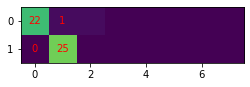

In [56]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# t-SNE DR

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
#takes plenty of time to execute
from sklearn.manifold import TSNE
import time
#time_start = time.time()
tsne = TSNE(n_components = 2, random_state = 0)
#tsne = TSNE()
X_train =tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

#print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 1  0  0  0  2  1  0 20]
 [ 0  0  0  0  0  0  0 25]
 [ 4  0  0  0  1  0  0 22]
 [ 0  3  0  0  0  0  0 28]
 [ 0  0  0  0  9  0  0 23]
 [ 6  0  0  0  0  0  0 18]
 [ 7  0  0  0  8  0  0 12]
 [22  0  0  0  0  0  0  4]]
Accuracy 0.06481481481481481


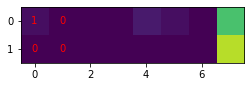

In [63]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 9  0  0  0  0  1  0 14]
 [ 6  0  0  0  0 12  0  7]
 [ 8  0  0  0  0  0  0 19]
 [18  0  0  0  0  7  0  6]
 [ 5  0  0  0  0  0  0 27]
 [17  0  0  0  0  7  0  0]
 [13  0  0  0  0  0  0 14]
 [22  0  0  0  0  1  0  3]]
Accuracy 0.08796296296296297


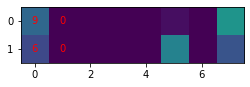

In [66]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [67]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 5  0  0  0  0  1  0 18]
 [ 0  0  0  0  0  1  0 24]
 [ 9  0  0  0  0  0  0 18]
 [ 0  0  0  0  0  0  0 31]
 [13  0  0  0  0  0  0 19]
 [ 5  0  0  0  0  0  0 19]
 [15  0  0  0  2  0  0 10]
 [22  0  0  0  0  1  0  3]]
Accuracy 0.037037037037037035


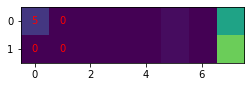

In [69]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [70]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

[10:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 3  0  0  1  0  0 11  9]
 [ 0  0  0  4  0  0  0 21]
 [13  0  3  1  0  0  3  7]
 [ 0  0  0  2  0  0  0 29]
 [ 4  0  0  1  2  0 15 10]
 [ 0  0  6  3  0  0  0 15]
 [ 3  0  0  1  2  0 13  8]
 [ 5  0  9  1  1  0  7  3]]
Accuracy 0.12037037037037036


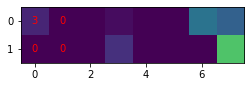

In [72]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Lasso L1 FS

In [73]:
from sklearn.linear_model import  Lasso 
model = Lasso(alpha=0.1)
model.fit(X, y)

# get importance
importance = model.coef_

#feat_importances = pd.Series(importance, index=X_train.columns)

In [89]:
res = pd.Series(importance, index=X.columns.values).sort_values(ascending=False)*100
res.nlargest(4)
#print(res)
threshold = -2.5
impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
print ("Selected Features =" + str(impftrs))


Selected Features =['Behavior', 'TRKA_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'RSK_N', 'AKT_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'BRAF_N', 'pRSK_N', 'NR2B_N', 'pCREB_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pELK_N', 'pPKCAB_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'AMPKA_N', 'pNUMB_N', 'GluR4_N', 'BAD_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BCL2_N', 'RAPTOR_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'IL1B_N', 'DYRK1A_N', 'GluR3_N', 'GFAP_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N']


In [93]:
from sklearn.model_selection import train_test_split

Selected_Features =['Behavior', 'TRKA_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'RSK_N', 'AKT_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'BRAF_N', 'pRSK_N', 'NR2B_N', 'pCREB_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pELK_N', 'pPKCAB_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'AMPKA_N', 'pNUMB_N', 'GluR4_N', 'BAD_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BCL2_N', 'RAPTOR_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'IL1B_N', 'DYRK1A_N', 'GluR3_N', 'GFAP_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N',  'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N']

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df[Selected_Features]

 #manual split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[16  0  7  0  1  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [12  0 12  0  3  0  0  0]
 [ 0 20  0  9  0  1  0  1]
 [ 7  0  5  0 20  0  0  0]
 [ 0 13  0  0  0  8  0  3]
 [ 9  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 0.5370370370370371


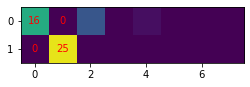

In [97]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[19  0  5  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 6  0 19  0  2  0  0  0]
 [ 0  0  0 30  0  0  0  1]
 [ 0  0  6  0 25  0  1  0]
 [ 0 10  0  0  0 14  0  0]
 [ 0  0  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 0.8518518518518519


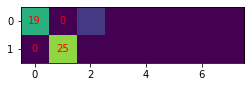

In [100]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [101]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[19  0  5  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 3  0 21  0  3  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 1  0  4  0 27  0  0  0]
 [ 0  6  0  1  0 17  0  0]
 [ 0  0  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 0.8888888888888888


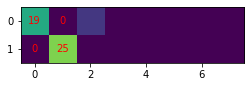

In [103]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [104]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

[10:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[20  0  2  0  2  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  2  0 30  0  0  0]
 [ 0  1  0  0  0 23  0  0]
 [ 0  0  0  0  2  0 25  0]
 [ 0  1  0  0  0  0  0 25]]
Accuracy 0.9537037037037037


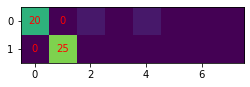

In [106]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Recursive Feature Elimination FS

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

In [108]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model = RFE(model, 10)
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


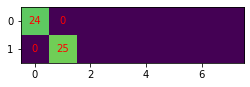

In [110]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='liblinear', random_state=0)
model = RFE(model, 10)
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


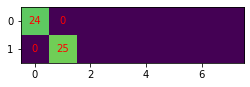

In [113]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = svm.SVC(kernel='linear') # Linear Kernel
model = RFE(model, 10)
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


# XGBoost

In [116]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=10)
model = RFE(model, 6)

In [117]:
model

RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, gamma=None, gpu_id=None,
                            importance_type='gain',
                            interaction_constraints=None, learning_rate=None,
                            max_delta_step=None, max_depth=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=10,
                            n_jobs=None, num_parallel_tree=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=None, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=None),
    n_features_to_select=6)

In [118]:
model.fit(X_train, y_train)

[10:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, gamma=None, gpu_id=None,
                            importance_type='gain',
                            interaction_constraints=None, learning_rate=None,
                            max_delta_step=None, max_depth=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=10,
                            n_jobs=None, num_parallel_tree=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=None, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=None),
    n_features_to_select=6)

In [119]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


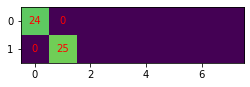

In [121]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Random Forest Feature Selection

In [122]:
from sklearn.ensemble import RandomForestRegressor
trees=35
threshold = 2
clf  = RandomForestRegressor(n_estimators=trees, random_state=43)
clf.fit(X_train, y_train)
#validationmetrics(clf,testX,testY)
res = pd.Series(clf.feature_importances_, index=X.columns.values).sort_values(ascending=False)*100
res.nlargest(10)

impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
print ("Selected Features =" + str(impftrs))


Selected Features =['Genotype', 'Treatment', 'Behavior']


In [123]:
Selected_Features =['Genotype', 'Treatment', 'Behavior']

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df[Selected_Features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy1.0


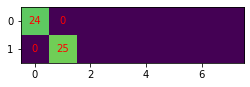

In [127]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


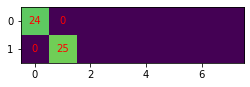

In [130]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

In [131]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


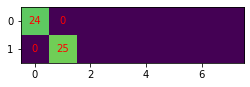

In [133]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [134]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

[10:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
Accuracy 1.0


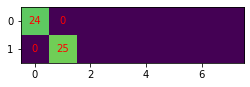

In [136]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost FS

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

copy_df = df.copy(deep=True)

y = copy_df['class']
X = copy_df.drop(['class'], axis=1)

In [138]:
from xgboost import plot_importance
from xgboost import XGBRegressor
from matplotlib import pyplot
# fit model no training data
model = XGBRegressor()
model.fit(X, y)

model.feature_importances_
# eval model
#X_train = X_train.feature_names

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01246363, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [139]:
feature = []
for col,score in zip(X.columns,model.feature_importances_):
    feature.append(col)
features = pd.Series(feature)

In [140]:
X = X[features]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

Accuracy 0.9351851851851852


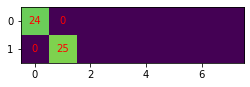

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Logistic Regression

Accuracy 1.0


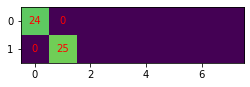

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

[10:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 1.0


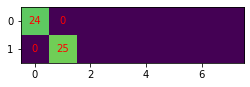

In [144]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM

Accuracy 1.0


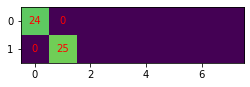

In [145]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()